In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
print("Shape of dataset:", data.shape)
data.head()

Shape of dataset: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.info()
print("Missing values:")
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
clean_data = data.dropna()
clean_data = clean_data[clean_data['price'] > 0]
print("Original rows:", len(data))
print("Clean rows:", len(clean_data))

Original rows: 48895
Clean rows: 38811


In [5]:
clean_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.881100e+04,3.881100e+04,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000,38811.000000
mean,1.810018e+07,6.424611e+07,40.728134,-73.951157,142.369199,5.868723,29.288088,1.373135,5.166757,114.881631
std,1.069502e+07,7.590371e+07,0.054992,0.046695,197.006883,17.390315,48.184653,1.680276,26.306326,129.535406
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720894e+06,7.028184e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887173e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756998e+07,1.018872e+08,40.762995,-73.935030,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


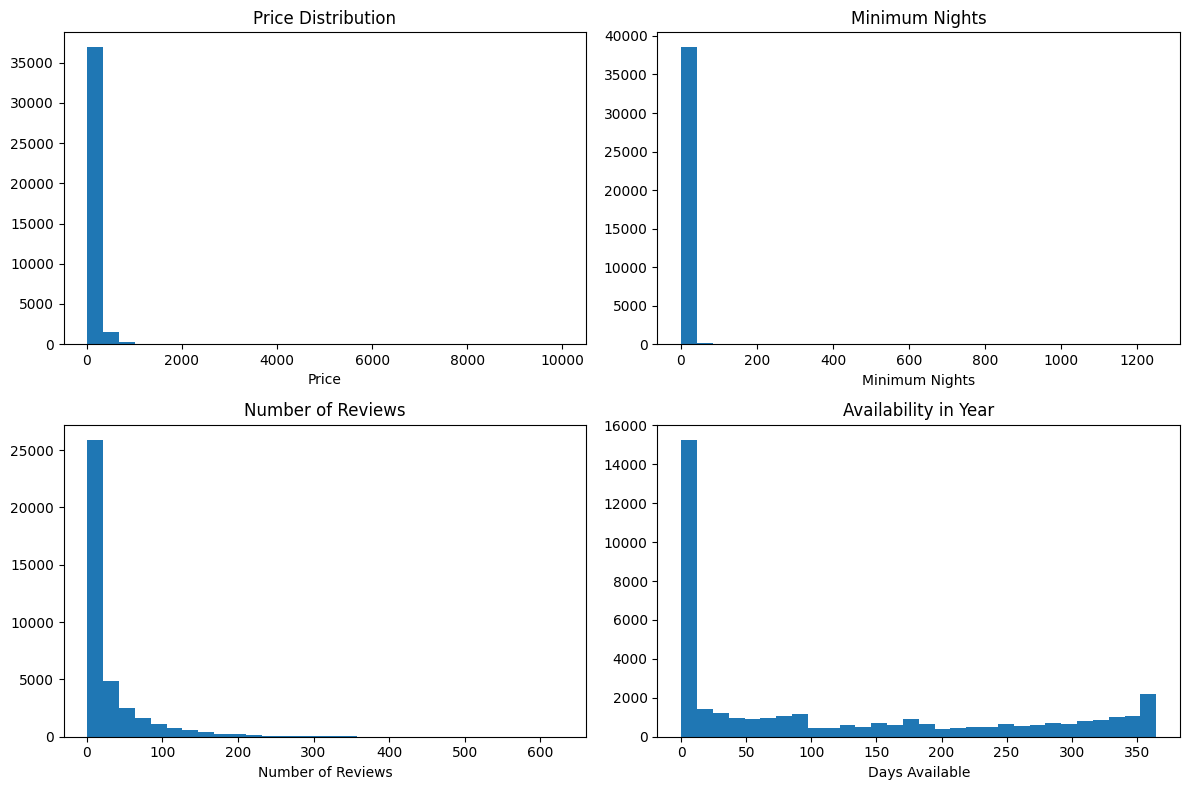

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(clean_data['price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')

plt.subplot(2, 2, 2)
plt.hist(clean_data['minimum_nights'], bins=30)
plt.title('Minimum Nights')
plt.xlabel('Minimum Nights')

plt.subplot(2, 2, 3)
plt.hist(clean_data['number_of_reviews'], bins=30)
plt.title('Number of Reviews')
plt.xlabel('Number of Reviews')

plt.subplot(2, 2, 4)
plt.hist(clean_data['availability_365'], bins=30)
plt.title('Availability in Year')
plt.xlabel('Days Available')

plt.tight_layout()
plt.show()

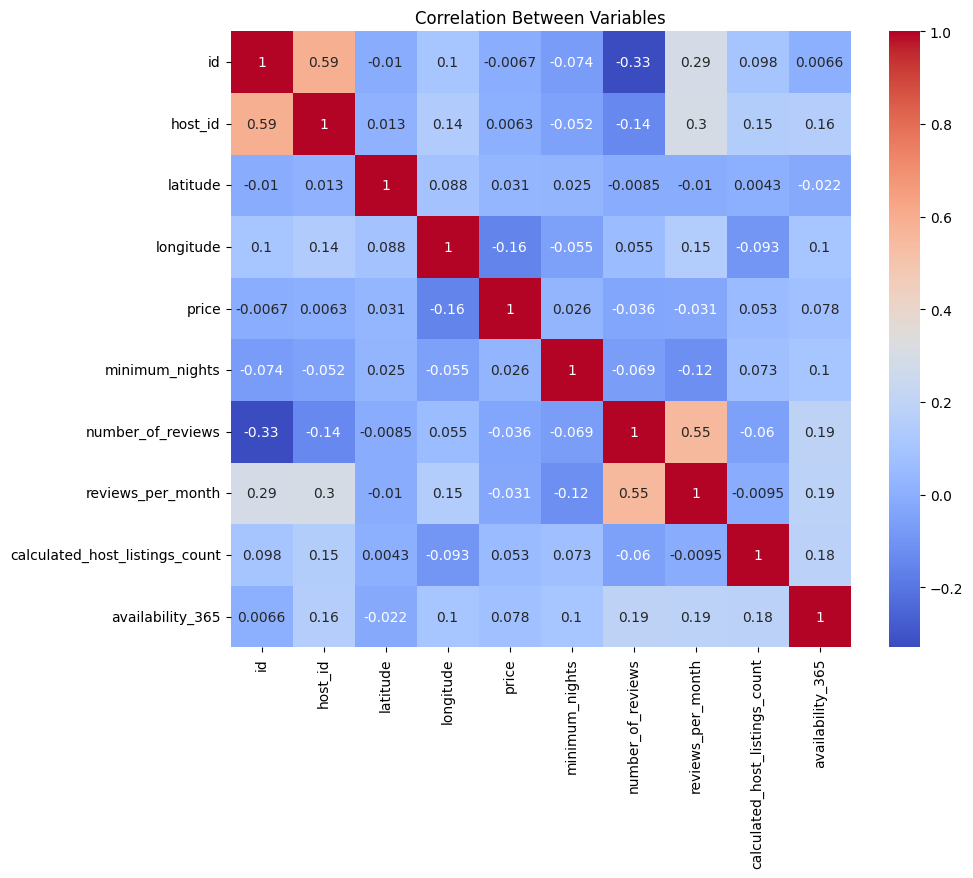

In [7]:
numeric_data = clean_data.select_dtypes(include=['number'])
correlation = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

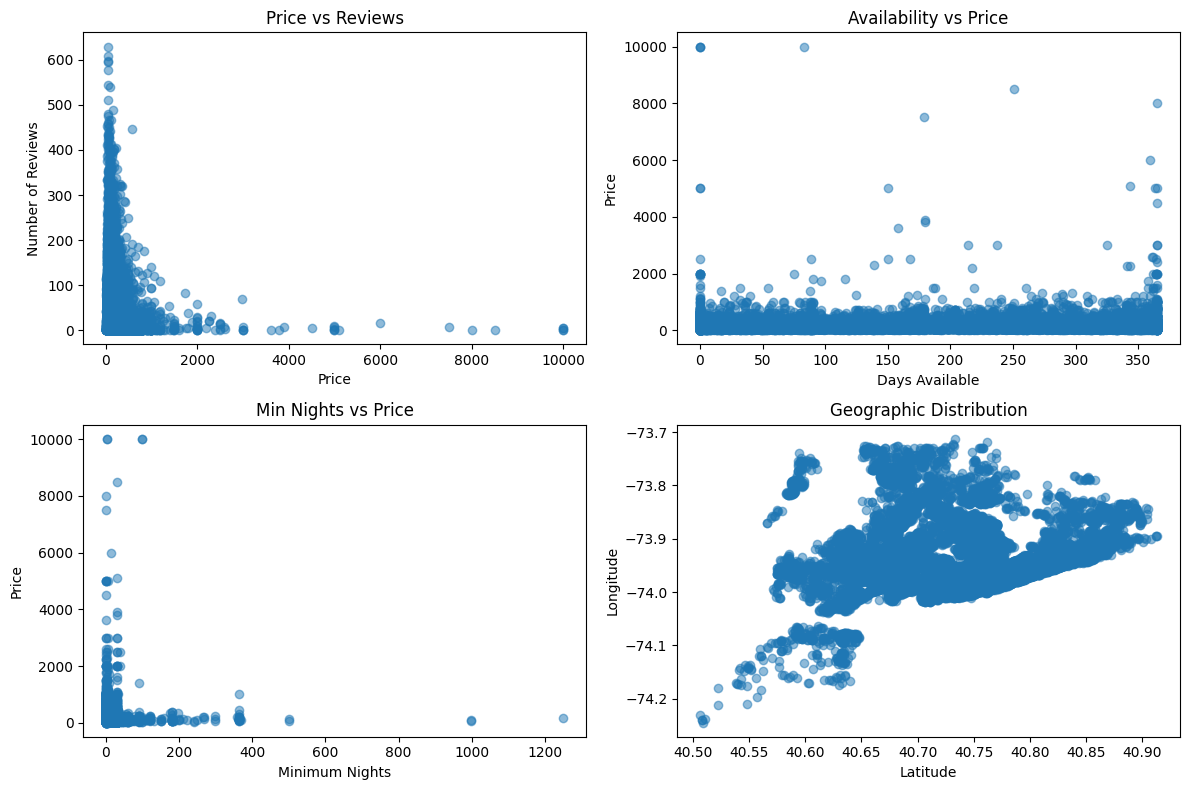

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(clean_data['price'], clean_data['number_of_reviews'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs Reviews')

plt.subplot(2, 2, 2)
plt.scatter(clean_data['availability_365'], clean_data['price'], alpha=0.5)
plt.xlabel('Days Available')
plt.ylabel('Price')
plt.title('Availability vs Price')

plt.subplot(2, 2, 3)
plt.scatter(clean_data['minimum_nights'], clean_data['price'], alpha=0.5)
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Min Nights vs Price')

plt.subplot(2, 2, 4)
plt.scatter(clean_data['latitude'], clean_data['longitude'], alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographic Distribution')

plt.tight_layout()
plt.show()

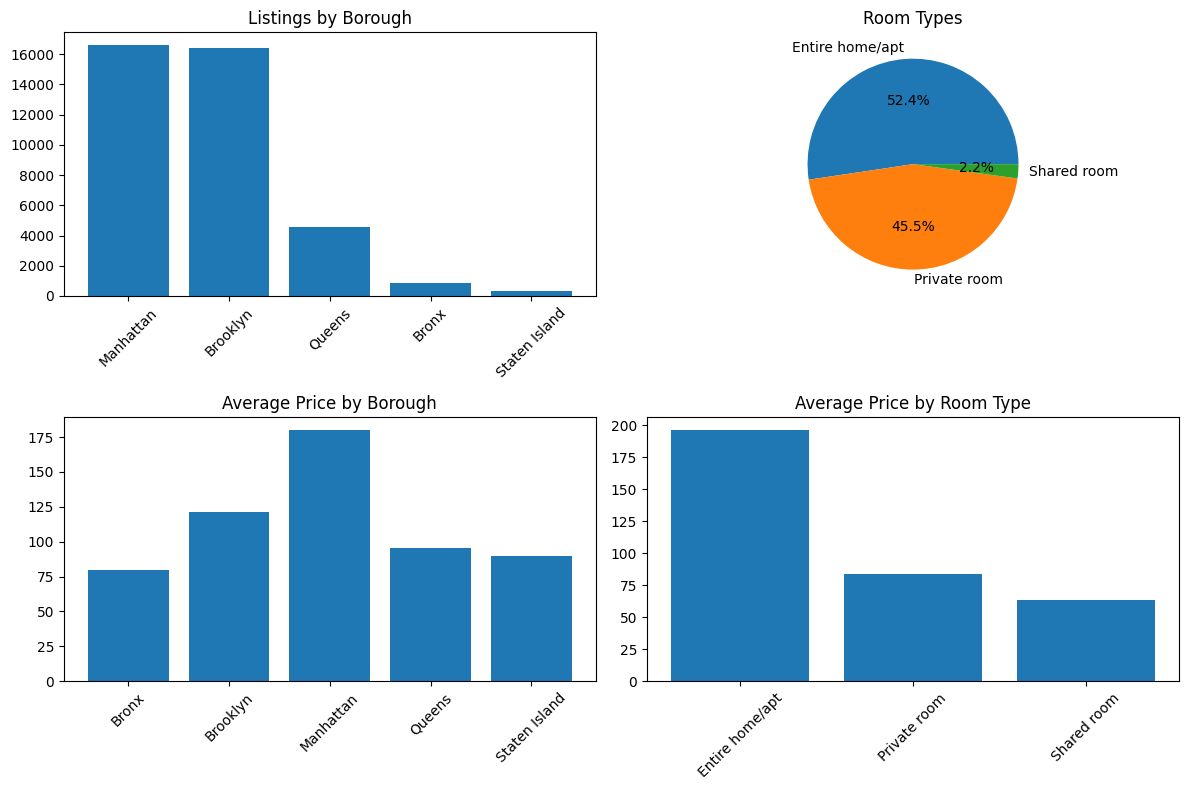

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
neighbourhood_counts = clean_data['neighbourhood_group'].value_counts()
plt.bar(neighbourhood_counts.index, neighbourhood_counts.values)
plt.title('Listings by Borough')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
room_counts = clean_data['room_type'].value_counts()
plt.pie(room_counts.values, labels=room_counts.index, autopct='%1.1f%%')
plt.title('Room Types')

plt.subplot(2, 2, 3)
avg_price_by_borough = clean_data.groupby('neighbourhood_group')['price'].mean()
plt.bar(avg_price_by_borough.index, avg_price_by_borough.values)
plt.title('Average Price by Borough')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
avg_price_by_room = clean_data.groupby('room_type')['price'].mean()
plt.bar(avg_price_by_room.index, avg_price_by_room.values)
plt.title('Average Price by Room Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

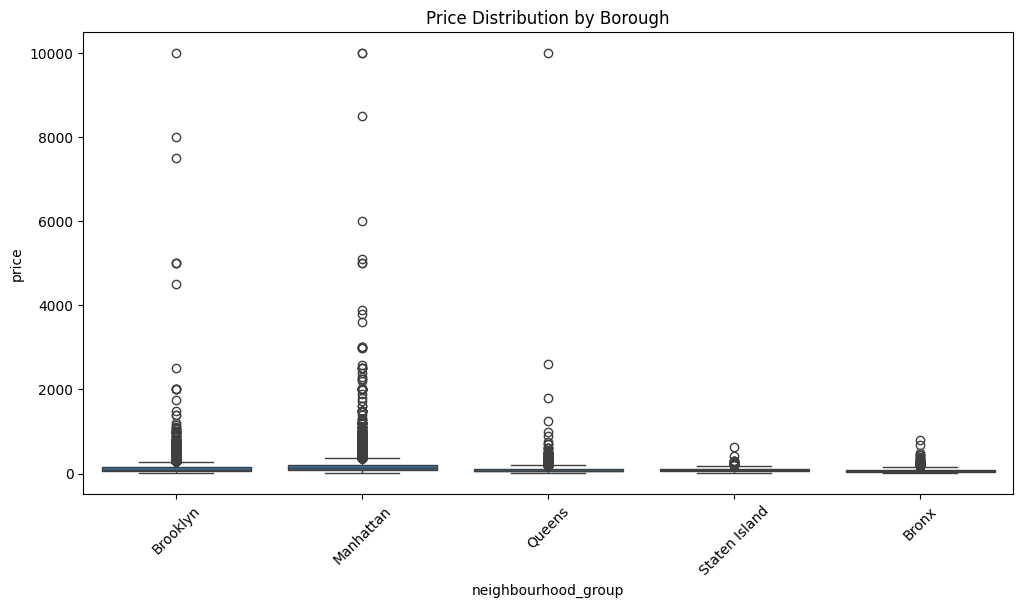

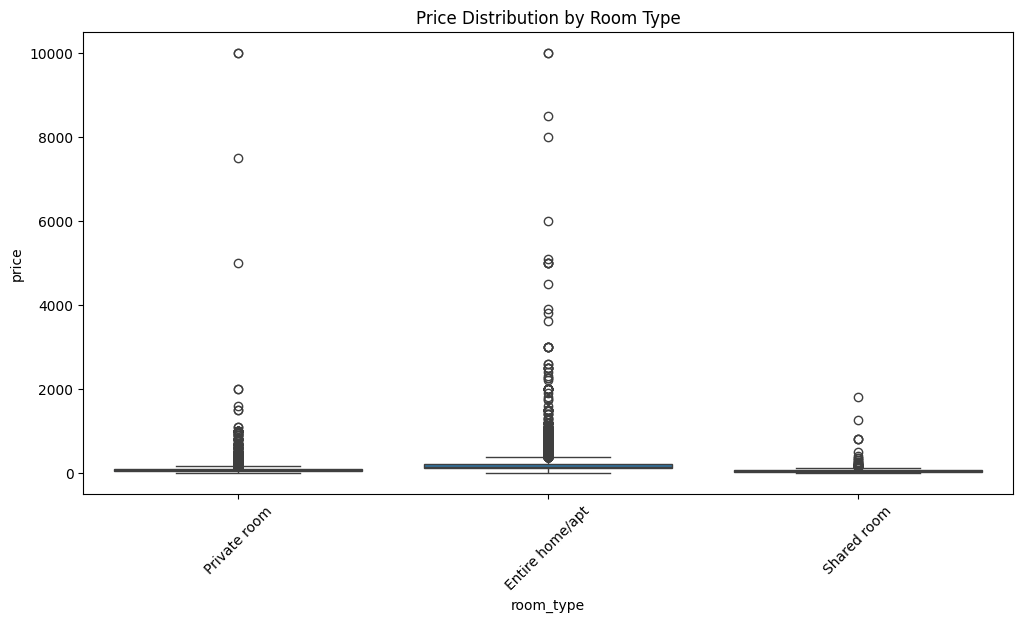

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data, x='neighbourhood_group', y='price')
plt.title('Price Distribution by Borough')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_data, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.xticks(rotation=45)
plt.show()

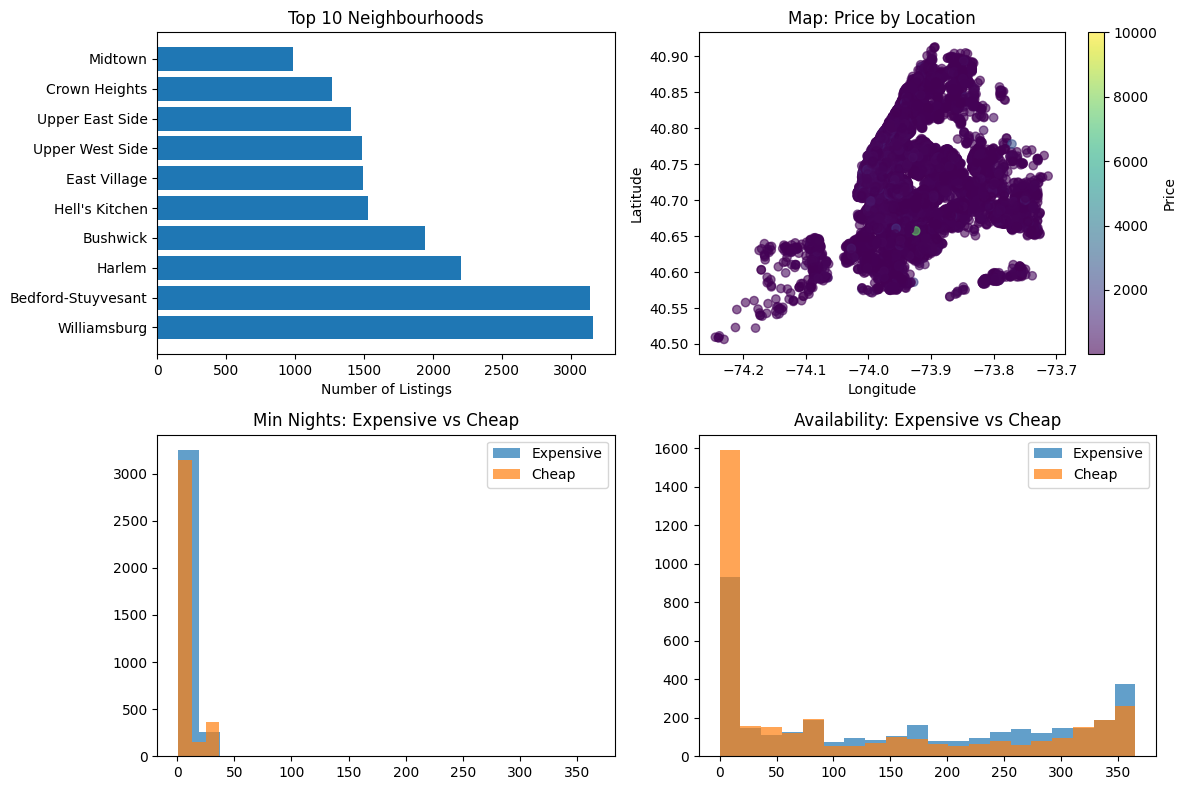

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
top_neighbourhoods = clean_data['neighbourhood'].value_counts().head(10)
plt.barh(top_neighbourhoods.index, top_neighbourhoods.values)
plt.title('Top 10 Neighbourhoods')
plt.xlabel('Number of Listings')

plt.subplot(2, 2, 2)
plt.scatter(clean_data['longitude'], clean_data['latitude'], 
           c=clean_data['price'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Price')
plt.title('Map: Price by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(2, 2, 3)
expensive_listings = clean_data[clean_data['price'] > clean_data['price'].quantile(0.9)]
cheap_listings = clean_data[clean_data['price'] < clean_data['price'].quantile(0.1)]
plt.hist(expensive_listings['minimum_nights'], alpha=0.7, label='Expensive', bins=20)
plt.hist(cheap_listings['minimum_nights'], alpha=0.7, label='Cheap', bins=20)
plt.title('Min Nights: Expensive vs Cheap')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(expensive_listings['availability_365'], alpha=0.7, label='Expensive', bins=20)
plt.hist(cheap_listings['availability_365'], alpha=0.7, label='Cheap', bins=20)
plt.title('Availability: Expensive vs Cheap')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
print("=== SUMMARY STATISTICS ===")
print(f"Total number of listings: {len(clean_data)}")
print(f"Average price: ${clean_data['price'].mean():.2f}")
print(f"Most expensive listing: ${clean_data['price'].max()}")
print(f"Cheapest listing: ${clean_data['price'].min()}")
print()

print("=== BY BOROUGH ===")
borough_stats = clean_data.groupby('neighbourhood_group')['price'].agg(['count', 'mean'])
print(borough_stats)
print()

print("=== BY ROOM TYPE ===")
room_stats = clean_data.groupby('room_type')['price'].agg(['count', 'mean'])
print(room_stats)

=== SUMMARY STATISTICS ===
Total number of listings: 38811
Average price: $142.37
Most expensive listing: $10000
Cheapest listing: $10

=== BY BOROUGH ===
                     count        mean
neighbourhood_group                   
Bronx                  874   79.649886
Brooklyn             16430  121.529823
Manhattan            16621  180.071596
Queens                4572   95.783683
Staten Island          314   89.964968

=== BY ROOM TYPE ===
                 count        mean
room_type                         
Entire home/apt  20320  196.325591
Private room     17647   84.018587
Shared room        844   63.363744


In [13]:
print("=== KEY FINDINGS ===")
print("1. Most listings are in Manhattan and Brooklyn")
print("2. Entire homes are more expensive than private/shared rooms")
print("3. Manhattan has the highest average prices")
print("4. Most listings require minimum 1-3 nights stay")
print("5. Price varies greatly by location within the city")
print("6. Expensive listings tend to be available fewer days")
print("7. Popular neighborhoods have more competition")
print("8. Room type is a major factor in pricing")
print("9. Location (borough) significantly affects price")
print("10. Most Airbnb listings are entire homes or apartments")

=== KEY FINDINGS ===
1. Most listings are in Manhattan and Brooklyn
2. Entire homes are more expensive than private/shared rooms
3. Manhattan has the highest average prices
4. Most listings require minimum 1-3 nights stay
5. Price varies greatly by location within the city
6. Expensive listings tend to be available fewer days
7. Popular neighborhoods have more competition
8. Room type is a major factor in pricing
9. Location (borough) significantly affects price
10. Most Airbnb listings are entire homes or apartments
